# Twitter Sentiment Prediction
## 1.1 Introduction
Taking a look at twitter, there are a lot of tweets generated every single second by different users. In addition, some of these tweets might be positive while the others might be negative. It would be really useful if machine learning and deep learning is deployed in real-time to classify the texts and tweets as positive, negative or neutral respectively. As a result of this, a lot of time and money would be saved by the company without the need to use manpower for these simple tasks respectively.

In this machine learning project, we would be working with real-time twitter tweets and predicting the sentiment of the text whether it is positive, negative or neutral. With the help of deep neural networks along with hyperparameter tuning, we would be classifying the tweets, ensuring that there is a good business value for the company by analyzing the text and understanding the working of machine learning models.

## 1.2 Metrics
Accuracy
Precision
Recall
1.3 Source
The dataset is taken from Kaggle. It is available in the website below. Feel free to download the dataset.

https://www.kaggle.com/c/tweet-sentiment-extraction/data

##VTable of Contents
* Reading the data
* Countplot of the Sentiment
* Positive Text WordCloud
* Negative Text WordCloud
* List of Stopwords
* Dividing the data into training and Cross Validation Data
* Function for Replacing Words
* Preprocessing the Text
* Tfidf Vectorizer
* Neural Network Model for Prediction
* Count Vectorizer
* Neural Network Model
* Plots of the Results

## Conclusion
Let us now start the project by reading some useful libraries that we would be working with from the start.

In [45]:
# Import necessary libraries for data manipulation, visualization, and deep learning
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import specific modules from TensorFlow/Keras for building the neural network
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Install the wordcloud library
!pip install wordcloud

In [46]:
import kagglehub

# Download the dataset from Kaggle Hub
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

# Print the path to dataset files
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-tweets-sentiment-dataset


1. Reading the data
We would be first reading the data that is present in the kaggle repository to ensure that we work with it.



In [47]:
import os
# List the files present in the downloaded dataset directory
print(os.listdir("/kaggle/input/twitter-tweets-sentiment-dataset"))

['Tweets.csv']


In [48]:
# Read the CSV file into a pandas DataFrame
# skiprows=[1] skips the original first row
twitter_df = pd.read_csv("/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv", skiprows=[1], header=None, names=['textID', 'Topic', 'selected_text', 'sentiment'])

Reading the head of the dataframe, we see that there are different columns such as textID, text, selected_text and the output that we are going to be predict which is sentiment respectively.

In [49]:
twitter_df.head()

,textID,Topic,selected_text,sentiment
0,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [50]:
twitter_df.tail()

,textID,Topic,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


We would be dropping the selected text as the test set does not contain those values. It would be good to leave only the text for the machine learning models for predictions respectively.

In [51]:
# Drop the 'selected_text' column
twitter_df.drop(['selected_text'], axis = 1, inplace = True)

Since we have removed the selected text, we are only left with the actual text values along with the sentiment whether it is positive, negative or neutral output respectively.

In [52]:
twitter_df.head()

,textID,Topic,sentiment
0,textID,text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


#2. Countplot of the Sentiment

As can be seen, there seems to be more neutral sentiment in the text compared to positive or negative tweets. That is true in real life as most of the tweets would be quite neutral without them being either too positive or too negative respectively.

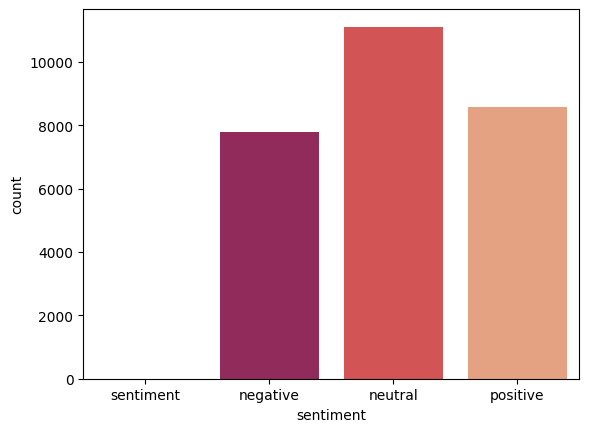

In [53]:
sns.countplot(x = 'sentiment', data = twitter_df, palette='rocket') # Added a palette for better visualization
plt.show()

Taking a look at the shape of the data, we see that there are about 27k data points that we are going to be working and applying our knowledge.

In [54]:
twitter_df.shape

(27481, 3)

Reading a few lines in a particular row of the text, we see that it is quite a simple tweet without being too lengthy.

df['text'].iloc[0]

In [55]:
twitter_df['Topic'].iloc[1]

' Sooo SAD I will miss you here in San Diego!!!'

Taking a look at the total number of characters from a single text, we see that there are about 36 characters respectively.



In [56]:
len(twitter_df['Topic'].iloc[1])

46

Let us now read the head of the text and see the values that are present to understand the working of the machine learning models respectively.



In [57]:
twitter_df['Topic'].head()

,Topic
0,text
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


Looking at the information present in our dataframe, we can see that almost all the values are not-null except a few that we are going to be clearing to ensure that those values don't interfere in the machine learning models and predictions respectively.



In [58]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   Topic      27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [59]:
twitter_df['Topic'].iloc[1]

' Sooo SAD I will miss you here in San Diego!!!'

In [60]:
text_length_list = []
for i in range(len(twitter_df)):
    if isinstance(twitter_df['Topic'].iloc[i], str): # Check if the value is a string
        text_length_list.append(len(twitter_df['Topic'].iloc[i])) # Calculate length if it's a string
    else:
        text_length_list.append(0) # Append 0 or handle non-string values as needed

In [61]:
isinstance("suhas", float)

False

In [62]:
# twitter_df['text_length'] = text_length_list
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   Topic      27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [63]:
twitter_df.dropna(inplace = True)

In [64]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   Topic      27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [65]:
# Calculate text length
twitter_df['text_length'] = twitter_df['Topic'].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [66]:
twitter_df.head()

,textID,Topic,sentiment,text_length
0,textID,text,sentiment,4
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [67]:
# Calculate word count
text_words_list = []
for text in twitter_df['Topic']:
    if isinstance(text, str):
        text_words_list.append(len(text.split()))
    else:
        text_words_list.append(0) # Handle non-string values, append 0 words
twitter_df['text_words'] = text_words_list

In [68]:
twitter_df.head()

,textID,Topic,sentiment,text_length,text_words
0,textID,text,sentiment,4,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [69]:
twitter_df['text_words'] = twitter_df['Topic'].apply(lambda x: len(x.split()))

In [70]:
twitter_df.head()

,textID,Topic,sentiment,text_length,text_words
0,textID,text,sentiment,4,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [71]:
## Separate dataframes for different sentiment values

positive_df = twitter_df[twitter_df['sentiment'] == 'positive']
negative_df = twitter_df[twitter_df['sentiment'] == 'negative']
neutral_df = twitter_df[twitter_df['sentiment'] == 'neutral']

In [72]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11116, 5)


In [73]:
wordcloud = WordCloud(width = 500, height = 500)

In [74]:
twitter_df.head()

,textID,Topic,sentiment,text_length,text_words
0,textID,text,sentiment,4,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [75]:
positive_df.head()

,textID,Topic,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [76]:
# Create list of positive tweet texts
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['Topic'].iloc[i])

In [77]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

# 3. Positive Text WordCloud

Worcloud gives us a good idea about the number of repeating words by the size of them. We see that there are some positive words such as "thank" and "good "which make up most of the positive reviews. There are also some words that occur quite rare such as "awesome" but these words also make a mark in the decisions respectively. In addition to this, we also find that there are very few words that are negative in the positive text. Therefore, we can conclude that words are a good indication of the polarity and sentiment of the text respectively.

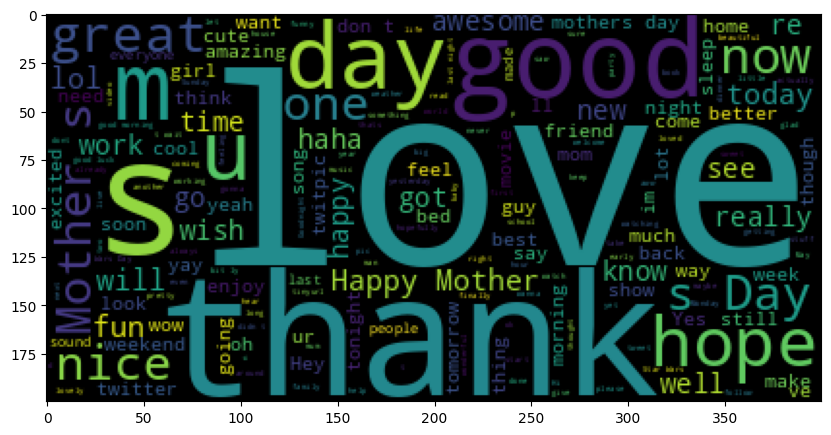

In [78]:
# Generate WordCloud for positive text
wordcloud = WordCloud(stopwords = STOPWORDS)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [79]:
# Create list of negative tweet texts
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['Topic'].iloc[i])

# 4. Negative Text WordCloud

As can be seen in the wordcloud, there are some words such as "miss" and "no" which are considered to be negative respectively. In addition to this, we see that there are some words such as "work" and "sorry" that also tend to be negative as this is quite true in real-life where we say "sorry" for some negative things done and so on. Therefore, getting the wordcloud would ensure that we get to know the words present in the wordcloud dictionary and ensure that we understand the full context of the review respectively.

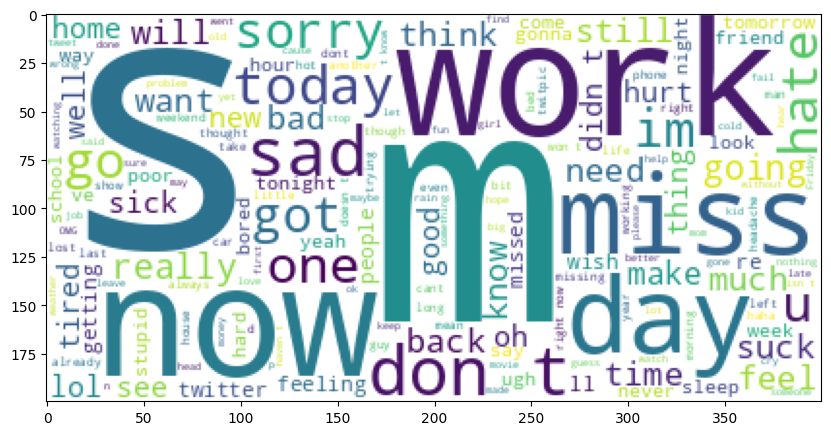

In [80]:
# Generate WordCloud for negative text
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [81]:
twitter_df.head()

,textID,Topic,sentiment,text_length,text_words
0,textID,text,sentiment,4,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [82]:
negative_df.head()

,textID,Topic,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [83]:
positive_df.head()

,textID,Topic,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


# 5. List of Stopwords

Let us now make a list of all the stopwords that we are going to be using for our machine learning purposes. We see that there are some good list of stopwords that I have taken from the link that is provided in the below cell. These would be used for the stopwords and ensure that we are getting the best results respectively.

In [84]:

# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [85]:
twitter_df.head()

,textID,Topic,sentiment,text_length,text_words
0,textID,text,sentiment,4,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [86]:
# Drop the 'textID' column
twitter_df.drop(['textID'], axis = 1, inplace = True)
# Drop the first row
twitter_df.drop(twitter_df.index[0], inplace=True)

In [87]:
twitter_df.head()

,Topic,sentiment,text_length,text_words
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14
5,http://www.dothebouncy.com/smf - some shameles...,neutral,92,12


In [88]:
X = twitter_df.drop(['sentiment'], axis = 1)
y = twitter_df['sentiment']

# 6. Dividing the Data into Training and Cross Validation Data

Now we are going to be dividing the data into training and cross validation data and ensure that we understand the machine learning model well. We are going to be dividing the data into 2 parts where 70 percent of the data is taken as the training data and the 30 percent of the data would be taken as the test data. There is a random state assigned to it and split to ensure that we get a good accuracy.

In [89]:
# Split data into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [90]:
print("The shape of the training data is: {}".format(X_train.shape))
print("The shape of the cross validation data is: {}".format(X_cv.shape))

The shape of the training data is: (19235, 3)
The shape of the cross validation data is: (8244, 3)


# 7. Function for Replacing Words
There is a separate function that is being used to replace the words and substitute them with the other words to ensure that we get the best machine learning results respectively.

In [91]:
# Import regular expression module
import re

# Define function to decontract words
def decontracted(phrase):
    # specific contraction replacements
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general contraction replacements
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [92]:
!pip install tqdm

# 8. Preprocessing the Text
It is now time to preprocess the text and understand the output. We are going to be using the above functions and also estimate the time it takes to complete the entire preprocessing respectively. Taking into account the different preprocessing text values, we are going to be appending those values and understanding the output respectively.

In [93]:
# Import tqdm for progress bar
from tqdm import tqdm
preprocessed_text = []
# Preprocess training text
for sentence in tqdm(X_train['Topic'].values):
    if isinstance(sentence, str):
        sent = decontracted(sentence)
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    else:
        preprocessed_text.append('')

100%|██████████| 19235/19235 [00:00<00:00, 24460.58it/s]


In [94]:
preprocessed_text[0: 5]

['kinda forgot much love darkness',
 'thanks morning laugh funny',
 'hurray twin girls born beautiful may day',
 'bah h8 waking',
 'im glad lot happier barakitten 3 see yah july']

In [95]:
# Assign preprocessed text back to X_train
for i in range(len(X_train)):
    X_train['Topic'].iloc[i] = preprocessed_text[i]

In [96]:
X_train.head()

,Topic,text_length,text_words
20847,kinda forgot much love darkness,43,9
10341,thanks morning laugh funny,53,10
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
17942,im glad lot happier barakitten 3 see yah july,60,12


In [97]:
# Import tqdm for progress bar
from tqdm import tqdm
preprocessed_text = []
# Preprocess cross-validation text
for sentence in tqdm(X_cv['Topic'].values):
    if isinstance(sentence, str):
        sent = decontracted(sentence)
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    else:
        preprocessed_text.append('')

100%|██████████| 8244/8244 [00:00<00:00, 15292.70it/s]


In [98]:
preprocessed_text[0: 5]

['watching neighbours',
 'no surprise probably know',
 'nope difference 5 omr c class anyone notice flight number wy flight lhr wy 911',
 'ok believe belly button lol',
 'friends mine meet today wait turn']

In [99]:
# Assign preprocessed text back to X_cv
for i in range(len(X_cv)):
    X_cv['Topic'].iloc[i] = preprocessed_text[i]

In [100]:
X_cv.head()

,Topic,text_length,text_words
7215,watching neighbours,23,3
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6601,ok believe belly button lol,47,9
7808,friends mine meet today wait turn,74,15


In [101]:
# Initialize LabelBinarizer
binarizer = LabelBinarizer()
# Convert y_train to binary matrix
y_train_converted = binarizer.fit_transform(y_train)
# Initialize another LabelBinarizer for y_cv
binarizer = LabelBinarizer()
# Convert y_cv to binary matrix
y_cv_converted = binarizer.fit_transform(y_cv)

In [102]:
y_cv_converted

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

# 9. Tfidf Vectorizer
With the help of Tfidf Vectorizer, it is easy to convert the text into the form of vector based on the word frequency and the inverse document frequency and get those values which could be fed to the machine learning models for prediction respectively. Having a look at those values, we are going to be taking them and predicting using the machine learning approach.

In [103]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
# Fit and transform X_train text
X_train_text = vectorizer.fit_transform(X_train['Topic'])
# Transform X_cv text
X_cv_text = vectorizer.transform(X_cv['Topic'])

In [104]:
print(X_train_text.shape)
print(X_cv_text.shape)

(19235, 20708)
(8244, 20708)


In [105]:
X_train_text[0: 5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 27 stored elements and shape (5, 20708)>

# 10. Neural Network Model for Prediction
We are going to be defining the neural network model and predicting the chances of a person suffering from a heart disease. Taking a look at the data, we see that there are different activation units that we are going to be working with and then, we are going to use the categorical cross entropy as this is a multiclass classification problem. There can be more metrics that we might take but let us deal with accuracy for now and use the adam optimizer respectively.

In [106]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [107]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [108]:
y_train

,sentiment
20847,neutral
10341,positive
11044,positive
14088,negative
17942,positive
...,...
15651,neutral
22639,positive
10125,positive
5602,positive


We are now going to be converting the output values in a series format so that we can give these values to the neural network models that we would be working respectively

In [109]:
# Initialize LabelEncoder
encoder = LabelEncoder()
# Encode y_train
y_train_encoded = encoder.fit_transform(y_train)

In [110]:
y_train_converted

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [111]:
# Convert encoded y_train to one-hot encoded
y_train_final = to_categorical(y_train_encoded)

In [112]:
X_train.head()

,Topic,text_length,text_words
20847,kinda forgot much love darkness,43,9
10341,thanks morning laugh funny,53,10
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
17942,im glad lot happier barakitten 3 see yah july,60,12


In [113]:
# Drop 'Topic' column from X_train
X_train_dropped = X_train.drop(['Topic'], axis = 1)

In [114]:
X_train.head()

,Topic,text_length,text_words
20847,kinda forgot much love darkness,43,9
10341,thanks morning laugh funny,53,10
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
17942,im glad lot happier barakitten 3 see yah july,60,12


In [115]:
X_train_dropped = X_train.drop(['Topic'], axis = 1)

In [116]:
X_train_dropped.head()

,text_length,text_words
20847,43,9
10341,53,10
11044,48,9
14088,19,5
17942,60,12


In [117]:
X_cv.head()

,Topic,text_length,text_words
7215,watching neighbours,23,3
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6601,ok believe belly button lol,47,9
7808,friends mine meet today wait turn,74,15


In [118]:
# Drop 'Topic' column from X_cv
X_cv_dropped = X_cv.drop(['Topic'], axis = 1)

In [119]:
X_cv_dropped.head()

,text_length,text_words
7215,23,3
19840,67,11
19409,102,19
6601,47,9
7808,74,15


We are going to be converting the values from 0 to 1 respectively. We would have to be converting those values so that it becomes easy to perform machine learning analysis and this ensures that there is no gradient shifting and having different range of weights when performing the machine learning analysis respectively.



In [120]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform X_train_dropped
X_train_final = scaler.fit_transform(X_train_dropped)
# Transform X_cv_dropped
X_cv_final = scaler.transform(X_cv_dropped)

In [121]:
X_train_final[0: 5]

array([[0.28985507, 0.25      ],
       [0.36231884, 0.28125   ],
       [0.32608696, 0.25      ],
       [0.11594203, 0.125     ],
       [0.41304348, 0.34375   ]])

In [122]:
X_cv_final[0: 5]

array([[0.14492754, 0.0625    ],
       [0.46376812, 0.3125    ],
       [0.7173913 , 0.5625    ],
       [0.31884058, 0.25      ],
       [0.51449275, 0.4375    ]])

In [123]:
# Initialize LabelEncoder for y_train
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Initialize LabelEncoder for y_cv
encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [124]:
# Convert encoded y_train to one-hot encoded
y_train_final = to_categorical(y_train_encoded)
# Convert encoded y_cv to one-hot encoded
y_cv_final = to_categorical(y_cv_encoded)

In [125]:
y_train_final[0: 5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [126]:
y_cv_final[0: 5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [127]:
X_train_final[0: 5]

array([[0.28985507, 0.25      ],
       [0.36231884, 0.28125   ],
       [0.32608696, 0.25      ],
       [0.11594203, 0.125     ],
       [0.41304348, 0.34375   ]])

In [128]:
X_train.head()

,Topic,text_length,text_words
20847,kinda forgot much love darkness,43,9
10341,thanks morning laugh funny,53,10
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
17942,im glad lot happier barakitten 3 see yah july,60,12


# 11. Count Vectorizer
Now we are going to be using the bag of words to understand the text and get a good knowledge about it. Since the data that is given to the machine learning models need to be in the form of vectors, it would be good to convert the text values into different vectors so that it becomes easy for the machine learning models to perform the computations respectively.

In [129]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform X_train text
X_train_vectorized = vectorizer.fit_transform(X_train['Topic'])
# Transform X_cv text
X_cv_vectorized = vectorizer.transform(X_cv['Topic'])

In [130]:
X_train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 136181 stored elements and shape (19235, 20708)>

In [131]:
X_train_final[0: 5]

array([[0.28985507, 0.25      ],
       [0.36231884, 0.28125   ],
       [0.32608696, 0.25      ],
       [0.11594203, 0.125     ],
       [0.41304348, 0.34375   ]])

Since the values that we have are not in the form of arrays and in the form of sparse matrices, it would be a good idea to convert the values into the form of arrays so that it becomes easy for the machine learning models to make the predictions and ensure that they are getting the best predictions.

In [132]:
# Convert sparse matrices to dense arrays
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

We have formed the arrays that we would be using and now it is time to understand the matrices and concatenate them so that we are going to perform the machine learning analysis respectively. We are now going to be using the deep neural networks and this would ensure that we are getting the best results respectively.

In [133]:
# Concatenate BoW features and scaled numerical features for training
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
# Concatenate BoW features and scaled numerical features for cross-validation
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

# 12. Neutral Network Model
We would now be using the deep neural networks that we are going to be learning and ensure that we are getting the best predictions respectively. We would start with 100 neutrons from the first layer and followed by 25 neutrons in the second layer and 10 units in the third layer followed by 3 final layers which we are going to be using the softmax classifier for predictions respectively.

In [134]:
# Initialize Sequential model
model = Sequential()
# Add Dense layers with Dropout
model.add(Dense(100, activation = 'relu', input_shape = (X_train_new.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
# Output layer with softmax for multi-class classification
model.add(Dense(3, activation = 'softmax'))
# Compile model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

We would be running the deep neutral network model for 10 epochs to ensure that we are going to be getting the best results in the test set respectively. We are also going to give the cross validation data and see how our model would be performing with the cross validation data, taking into account different parameters such as accuracy and cross validation loss respectively.



In [135]:
# Train the neural network model
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4527 - loss: 1.0445 - val_accuracy: 0.6794 - val_loss: 0.7696
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7119 - loss: 0.7085 - val_accuracy: 0.6929 - val_loss: 0.7260
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8233 - loss: 0.4906 - val_accuracy: 0.6823 - val_loss: 0.7852
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8660 - loss: 0.3648 - val_accuracy: 0.6678 - val_loss: 0.9157
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9104 - loss: 0.2669 - val_accuracy: 0.6687 - val_loss: 1.0407
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9362 - loss: 0.2003 - val_accuracy: 0.6638 - val_loss: 1.1891
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9486 - loss: 0.1562 - val_accuracy: 0.6607 - val_loss: 1.3190
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9535 - loss: 0.1356 - val_accuracy:

# 13. Plots of the Results
We would now be looking at the deep neural network plots and see how the values of accuracy and loss change with respect to the number of epochs that we are running. We see that as the number of epochs increase, there seems to be overfitting where the cross validation loss tends to go higher though there is a decrease in the training loss respectively. This gives us a clear indication that the model is overfitting after certain number of epochs are met. Therefore, we would be taking the right number of epochs when we are performing the machine learning analysis.

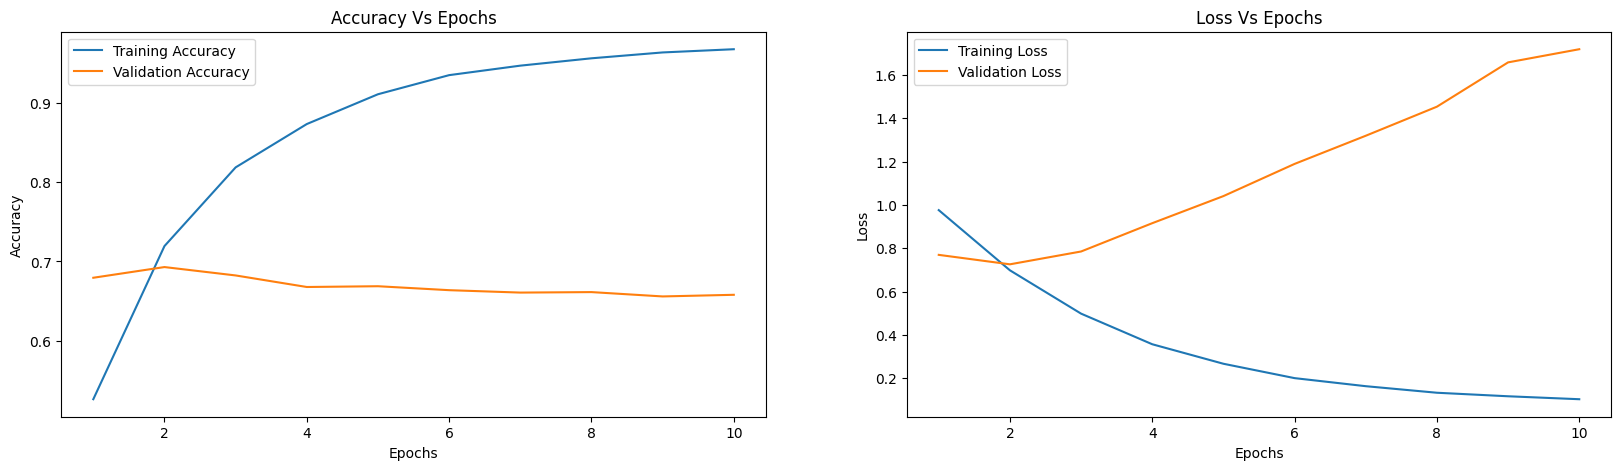

In [136]:
# Get training and validation metrics from history
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
# Create epoch numbers
epochs = np.arange(1, len(accuracy) + 1)
# Create subplots for plotting
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

# Plot accuracy
sns.lineplot(x = epochs, y = accuracy, ax = ax[0], label='Training Accuracy')
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0], label='Validation Accuracy')
ax[0].set_title('Accuracy Vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot loss
sns.lineplot(x = epochs, y = loss, ax = ax[1], label='Training Loss')
sns.lineplot(x = epochs, y = val_loss, ax = ax[1], label='Validation Loss')
ax[1].set_title('Loss Vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Display plots
plt.show()

# 14. Conclusions
It would be a good idea to use some tools such as wordcloud when we are doing Natural Language Processing (NLP) to ensure that we are getting the best results for predictions respectively. We would be able to understand the frequently occurring words from the less frequently occurring words by the size of the words that are plotted in the wordcloud respectively.
Steps should be taken to ensure that the model does not overfit or underfit. This ensures that the best predictions are being generated and therefore, we are going to get the best outputs respectively.
Standarizing the text and ensuring that the values lie between 0 and 1 would be good as this would allow the machine learning models to generate weights that are quite small rather than having different weight range values.